### Ejercicio - Regresión Lineal
Predicción de salario a partir de años de experiencia

In [3]:
#Importar paquetes

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
dataset = pd.read_csv('salary.csv')

In [5]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
dataset.iloc[:,[0]]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
dataset.loc[:,'Salary']

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: Salary, dtype: int64

In [8]:
dataset[["Salary"]]

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [11]:
dataset.iloc[:,[0]].values

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [12]:
x = dataset.iloc[:,[0]].values
y = dataset.iloc[:,[1]].values

In [13]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [14]:
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872],
       [127345],
       [126756],
       [128765],
       [135675],
       [139465]], dtype=int64)

In [15]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [16]:
t,f = True, False

In [17]:
t

True

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [19]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [20]:
x_train

array([[ 3.2],
       [ 2. ],
       [ 3.9],
       [ 5.3],
       [ 3.7],
       [12.3],
       [ 5.1],
       [ 7.1],
       [13.5],
       [ 1.1],
       [ 8.7],
       [10.5],
       [ 9.5],
       [ 4. ],
       [12.9],
       [11.2],
       [11.5],
       [ 5.9],
       [ 2.9],
       [ 3.2],
       [ 4.9],
       [ 4. ],
       [ 1.5],
       [ 6.8],
       [ 2.2],
       [ 6. ],
       [ 8.2],
       [ 3. ]])

In [21]:
x_test

array([[ 9.6],
       [ 9. ],
       [ 4.1],
       [ 4.5],
       [ 7.9],
       [10.3],
       [ 1.3]])

In [22]:
y_train

array([[ 54445],
       [ 43525],
       [ 63218],
       [ 83088],
       [ 57189],
       [128765],
       [ 66029],
       [ 98273],
       [139465],
       [ 39343],
       [109431],
       [121872],
       [116969],
       [ 56957],
       [135675],
       [127345],
       [126756],
       [ 81363],
       [ 56642],
       [ 64445],
       [ 67938],
       [ 55794],
       [ 37731],
       [ 91738],
       [ 39891],
       [ 93940],
       [113812],
       [ 60150]], dtype=int64)

In [23]:
y_test

array([[112635],
       [105582],
       [ 57081],
       [ 61111],
       [101302],
       [122391],
       [ 46205]], dtype=int64)

In [25]:
regressor = LinearRegression()

In [27]:
help(LinearRegression.fit)

Help on function fit in module sklearn.linear_model._base:

fit(self, X, y, sample_weight=None)
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [28]:
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
help(regressor.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [30]:
arr = np.array([[15],[5]])
print(regressor.predict(arr))

[[159640.41094537]
 [ 72688.70267085]]


In [31]:
x_test

array([[ 9.6],
       [ 9. ],
       [ 4.1],
       [ 4.5],
       [ 7.9],
       [10.3],
       [ 1.3]])

In [32]:
y_pred = regressor.predict(x_test)

In [33]:
y_test

array([[112635],
       [105582],
       [ 57081],
       [ 61111],
       [101302],
       [122391],
       [ 46205]], dtype=int64)

In [35]:
y_pred

array([[112686.48847713],
       [107469.38598066],
       [ 64863.04892615],
       [ 68341.11725713],
       [ 97904.69807046],
       [118773.10805635],
       [ 40516.57060928]])

# Visualización


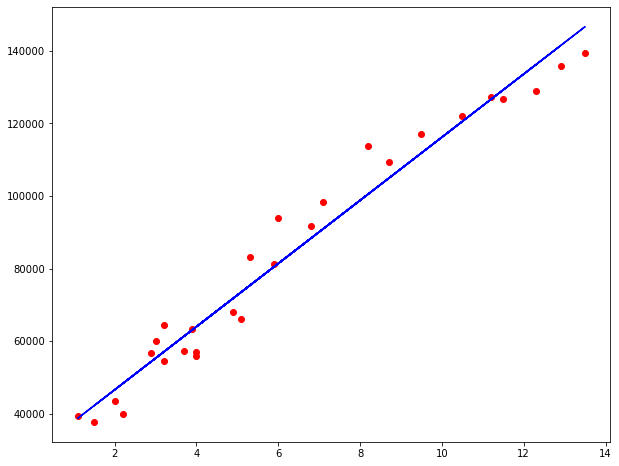

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.show()

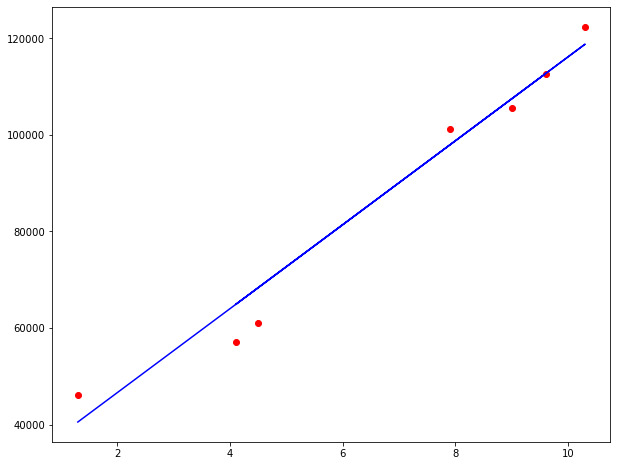

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),color='blue')
plt.show()